# Community detection algorithms

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

It consists of the following steps:
<br\>
**Input:** Transition matrix $T = D^{-1}A$
<br\>
**Output:** Adjacency matrix $M^*$
<br\>
<br\>
1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Remove entries that are close to $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the rows of the matrix. 
<br\>
* What advantages and disadvantages does this method have?
* Run this method for network [1](https://www.hse.ru/data/2017/03/25/1169907426/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
import scipy
import scipy.io
%matplotlib inline

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


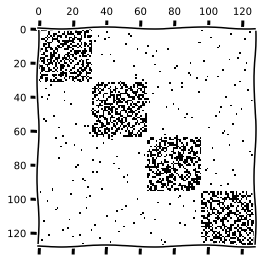

In [4]:
data = scipy.io.loadmat('network1.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']
# Continue here
#


In [8]:
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        print('step ', step)
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()

In [15]:
M = MCL(A, 0.001, 2, 2)

step  1
step  2
step  3
step  4
step  5
step  6
step  7
step  8
step  9
step  10
step  11
step  12
step  13
step  14
step  15
step  16


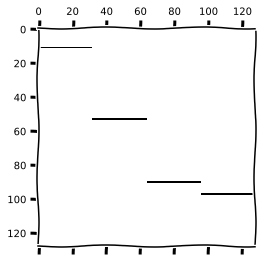

In [16]:
plt.spy(M)